In [5]:
from bezier_curve import BezierCurve, make_control_point, newton_raphson
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy

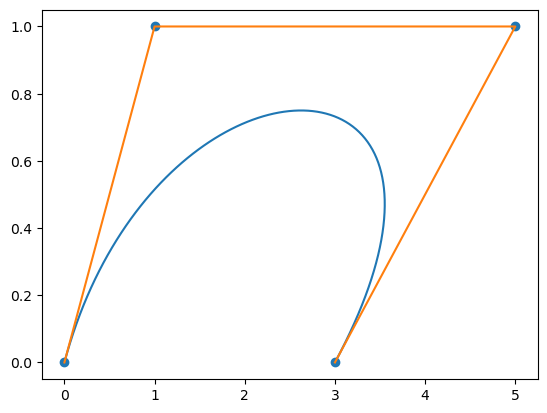

In [69]:
p0 = [0, 0]
p1 = [1, 1]
p12 = [1, -1]
p122 = [3, -4]
p2 = [5, 1]
p3 = [3, 0]

control_points = [p0, p1, p2, p3]
bc = BezierCurve(control_points)
fn = bc.get_callable()
t = np.linspace(0, 1, 100)
x = fn(t)
plt.plot(x[0,0], x[1,0])
plt.plot(*zip(*control_points))
plt.scatter(*zip(*control_points))

In [88]:
expr = bc.expr
expr = expr.expand()
expr0 = sy.collect(expr[0], bc.t)
expr1 = sy.collect(expr[1], bc.t)
expr = sy.Matrix([expr0, expr1])
optimizer, p0 = newton_raphson(expr, bc.t)
opt_expr = optimizer.simplify()
# n, d = sy.fraction(opt_expr)
# n = n.factor()
# d = d.factor()
# opt_expr = n / d
opt_expr

(81*t**5 - 135*t**4 + 24*t**3 + 9*t**2*x_0 + 18*t**2 - 6*t*x_0 + 2*t*y_0 + 6*t - x_0 - y_0)/(405*t**4 - 540*t**3 + 72*t**2 + 18*t*x_0 + 36*t - 6*x_0 + 2*y_0 + 6)

In [ ]:
f_optimizer = sy.lambdify([bc.t, p0], opt_expr)
f_curve = sy.lambdify(bc.t, expr)

def closest_point(x, y, t0 = 0):
    tol = 1e-3
    t = t0
    i = 0
    max_iter = 1000
    while i < max_iter:
        dt = f_optimizer(t, (x, y))
        t -= dt
        if abs(dt) < tol:
            break
        i += 1
    if i == max_iter:
        raise ValueError("Did not converge")
    return f_curve(t).flatten(), t

<lambdifygenerated-46>:3: RuntimeWarning: divide by zero encountered in scalar divide
  return (81*t**5 - 135*t**4 + 24*t**3 + 9*t**2*x_0 + 18*t**2 - 6*t*x_0 + 2*t*y_0 + 6*t - x_0 - y_0)/(405*t**4 - 540*t**3 + 72*t**2 + 18*t*x_0 + 36*t - 6*x_0 + 2*y_0 + 6)
<lambdifygenerated-47>:2: RuntimeWarning: invalid value encountered in scalar add
  return array([[-9*t**3 + 9*t**2 + 3*t], [-3*t**2 + 3*t]])
<lambdifygenerated-46>:3: RuntimeWarning: invalid value encountered in scalar subtract
  return (81*t**5 - 135*t**4 + 24*t**3 + 9*t**2*x_0 + 18*t**2 - 6*t*x_0 + 2*t*y_0 + 6*t - x_0 - y_0)/(405*t**4 - 540*t**3 + 72*t**2 + 18*t*x_0 + 36*t - 6*x_0 + 2*y_0 + 6)


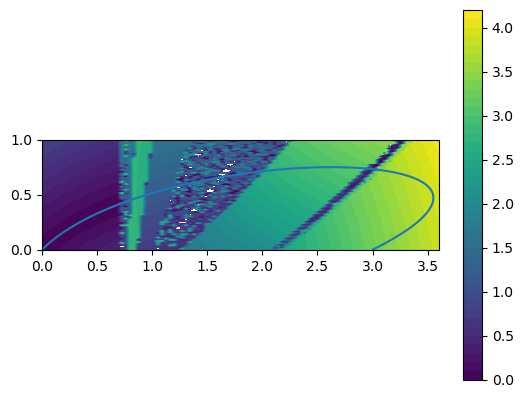

In [90]:
xx, yy = np.mgrid[0:3.6:100j, 0:1:100j]
dd = np.zeros_like(xx)
t0 = 0
for i, (xx_, yy_) in enumerate(zip(xx, yy)):
    for j, (x_, y_) in enumerate(zip(xx_, yy_)):
        try:
            p_, t0 = closest_point(x_, y_, 0)
            dd[i, j] = np.linalg.norm([x_, y_] - p_)
        except ValueError:
            dd[i, j] = np.nan

fig, ax = plt.subplots(1,1)

cf = ax.contourf(xx, yy, dd, levels=50)
fig.colorbar(cf)

t = np.linspace(0, 1, 100)
x_ = f_curve(t)
ax.plot(x_[0,0], x_[1,0])
# ax.plot(*zip(*control_points))
# ax.scatter(*zip(*control_points)) 
ax.set_aspect('equal')

In [11]:
degree = 3
control_points = [make_control_point(i) for i in range(degree + 1)]
bc = BezierCurve(control_points)
expr = bc.expr
expr = expr.expand()
expr0 = sy.collect(expr[0], bc.t)
expr1 = sy.collect(expr[1], bc.t)
expr = sy.Matrix([expr0, expr1])
expr

Matrix([
[t**3*(-u_0 + 3*u_1 - 3*u_2 + u_3) + t**2*(3*u_0 - 6*u_1 + 3*u_2) + t*(-3*u_0 + 3*u_1) + u_0],
[t**3*(-v_0 + 3*v_1 - 3*v_2 + v_3) + t**2*(3*v_0 - 6*v_1 + 3*v_2) + t*(-3*v_0 + 3*v_1) + v_0]])

In [ ]:
poly = sy.Poly(expr[0], bc.t).coeffs()

[-u_0 + 3*u_1 - 3*u_2 + u_3, 3*u_0 - 6*u_1 + 3*u_2, -3*u_0 + 3*u_1, u_0]